In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

<br>
<br>

### Data Collection

In [2]:
# loading csv file
data = pd.read_csv("../data/data.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
# checking data
data.shape

(10000, 14)

In [4]:
# checking for duplicate values
data.duplicated().any()

False

In [5]:
# checking for missing values
data.isna().any().any()

False

<br>
<br>
<br>

### EDA

In [47]:
data.Exited.value_counts()
# target variable
# action: -

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
data.RowNumber.nunique()
# all uniques values
# action: remove

10000

In [17]:
data.CustomerId.nunique()
# all uniques values
# action: remove

10000

In [18]:
data.Surname.nunique()
# not important (currently)
# action: remove

2932

In [19]:
data.CreditScore.describe()
# sensible values
# action: -

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

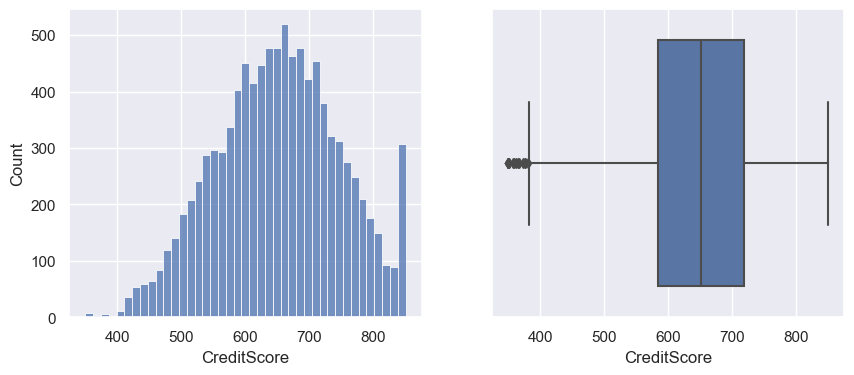

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=data.CreditScore)
plt.subplot(1, 2, 2)
sns.boxplot(x=data.CreditScore)
plt.show()
# normally distributes
# action: scale down

In [23]:
data.Geography.value_counts()
# 3 uniques countries
# action: encode

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
data.Gender.value_counts()
# 2 unique values
# action: binary encode

Male      5457
Female    4543
Name: Gender, dtype: int64

In [25]:
data.Age.describe()
# sensible values
# action: -

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

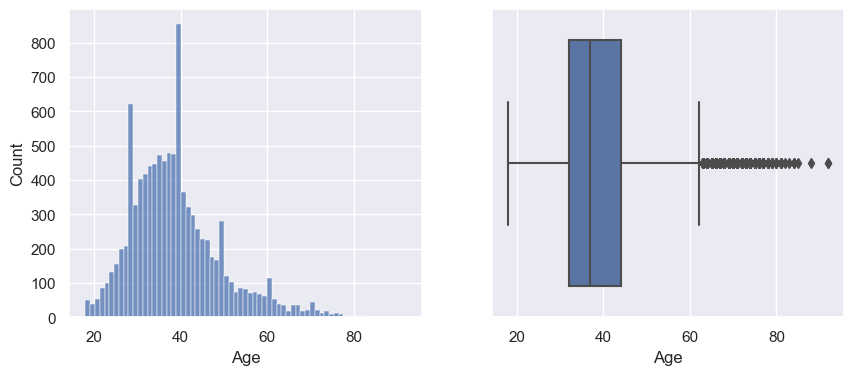

In [33]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=data.Age)
plt.subplot(1, 2, 2)
sns.boxplot(x=data.Age)
plt.show()
# right skewed
# action: robust scaling

In [36]:
data.Tenure.value_counts()
# ordinal data
# action: normalize

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [37]:
data.Balance.describe()
# very large range
# action: -

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

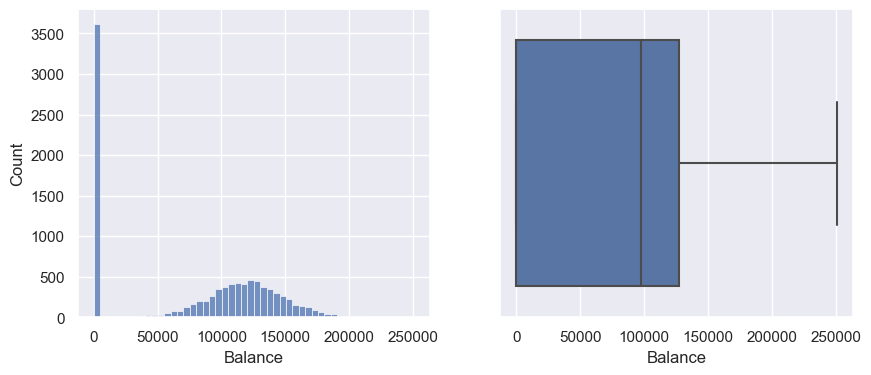

In [39]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=data.Balance, bins=50)
plt.subplot(1, 2, 2)
sns.boxplot(x=data.Balance)
plt.show()
# normally distributed
# action: scale down

In [40]:
data.NumOfProducts.value_counts()
# ordinal data
# action: normalize

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [41]:
data.HasCrCard.value_counts()
# 2 unique values
# action: binary encode

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [43]:
data.IsActiveMember.value_counts()
# 2 unique values
# action: binary encode

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [44]:
data.EstimatedSalary.describe()
# very large range
# action: -

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

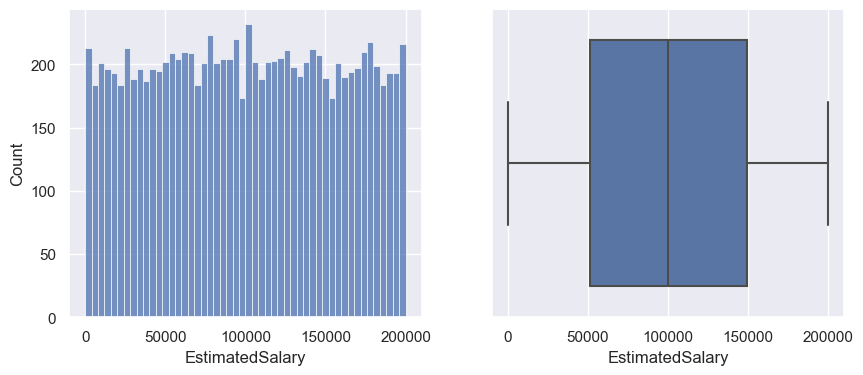

In [46]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=data.EstimatedSalary, bins=50)
plt.subplot(1, 2, 2)
sns.boxplot(x=data.EstimatedSalary)
plt.show()
# evenly distributed
# action: scale down

<br>
<br>
<br>

### EDA Results

In [48]:
# robust scaling of numerical data
# normalizing of ordinal data
# encoding of categorical data
# binary encoding of binary data

In [49]:
# features seperated by their type

numerical_features = [
    "CreditScore",
    "Age",
    "Balance",
    "EstimatedSalary",
]

ordinal_features = [
    "Tenure",
    "NumOfProducts",
]

categorical_features = [
    "Geography",
]

binary_features = [
    "Gender",
    "HasCrCard",
    "IsActiveMember",
]

<br>
<br>
<br>

### Data Preparation

In [9]:
from sklearn.model_selection import train_test_split

In [6]:
# seperating features
X = data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [7]:
# seperating columns
y = data[["Exited"]]
y.head(3)

,Exited
0,1
1,0
2,1


In [10]:
# creating training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [11]:
# verifying shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


<br>
<br>
<br>

### Data Preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [13]:
# features seperated by their type

numerical_features = [
    "CreditScore",
    "Age",
    "Balance",
    "EstimatedSalary",
]

ordinal_features = [
    "Tenure",
    "NumOfProducts",
]

categorical_features = [
    "Geography",
]

binary_features = [
    "Gender",
    "HasCrCard",
    "IsActiveMember",
]

In [14]:
# scaler objects
robust_scaler = RobustScaler()
min_max_scaler = MinMaxScaler()

In [15]:
# scaling numerical data with robust scaler
numerical_data = x_train[numerical_features].copy()
numerical_scaled = robust_scaler.fit_transform(numerical_data)
numerical_scaled = pd.DataFrame(numerical_scaled, index=numerical_data.index, columns=numerical_data.columns)
numerical_scaled.head(3)

,CreditScore,Age,Balance,EstimatedSalary
3240,-0.537313,1.083333,0.220675,-0.426132
1944,0.977612,0.166667,-0.764084,0.457168
7428,-1.111940,-0.416667,0.021725,0.602334


In [16]:
# scaling ordinal data with min max scaler
oridnal_data = x_train[ordinal_features].copy()
ordinal_scaled = min_max_scaler.fit_transform(oridnal_data)
ordinal_scaled = pd.DataFrame(ordinal_scaled, index=oridnal_data.index, columns=oridnal_data.columns)
ordinal_scaled.head(3)

,Tenure,NumOfProducts
3240,0.0,0.000000
1944,0.9,0.333333
7428,0.9,0.333333


In [17]:
# encoding categorical data
categorical_data = x_train[categorical_features].copy()
categorical_encoded = pd.get_dummies(categorical_data)
categorical_encoded.head(3)

,Geography_France,Geography_Germany,Geography_Spain
3240,1,0,0
1944,0,0,1
7428,0,0,1


In [18]:
# encoding binary data
binary_encoded = x_train[binary_features].copy()
binary_encoded['Gender'] = binary_encoded.Gender.apply(lambda x: 1 if x == 'Male' else 0)
binary_encoded.head(3)

,Gender,HasCrCard,IsActiveMember
3240,1,1,0
1944,1,1,0
7428,1,1,1


In [19]:
# combining together
training_data = pd.concat([numerical_scaled, ordinal_scaled, categorical_encoded, binary_encoded], axis=1)
training_data.head(3)

,CreditScore,Age,Balance,EstimatedSalary,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender,HasCrCard,IsActiveMember
3240,-0.537313,1.083333,0.220675,-0.426132,0.0,0.000000,1,0,0,1,1,0
1944,0.977612,0.166667,-0.764084,0.457168,0.9,0.333333,0,0,1,1,1,0
7428,-1.111940,-0.416667,0.021725,0.602334,0.9,0.333333,0,0,1,1,1,1


In [20]:
# checking info
print(training_data.dtypes.value_counts())
print(training_data.isna().any().any())

# saving column order
training_columns = training_data.columns

float64    6
uint8      3
int64      3
dtype: int64
False


In [22]:
# same above process on testing data

numerical_data = x_test[numerical_features].copy()
numerical_scaled = robust_scaler.transform(numerical_data)
numerical_scaled = pd.DataFrame(numerical_scaled, index=numerical_data.index, columns=numerical_data.columns)

oridnal_data = x_test[ordinal_features].copy()
ordinal_scaled = min_max_scaler.transform(oridnal_data)
ordinal_scaled = pd.DataFrame(ordinal_scaled, index=oridnal_data.index, columns=oridnal_data.columns)

categorical_data = x_test[categorical_features].copy()
categorical_encoded = pd.get_dummies(categorical_data)

binary_encoded = x_test[binary_features].copy()
binary_encoded['Gender'] = binary_encoded.Gender.apply(lambda x: 1 if x == 'Male' else 0)

In [23]:
# combining testing data
testing_data = pd.concat([numerical_scaled, ordinal_scaled, categorical_encoded, binary_encoded], axis=1)
testing_data.head(3)

,CreditScore,Age,Balance,EstimatedSalary,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender,HasCrCard,IsActiveMember
8597,-0.134328,1.333333,0.127677,0.073900,0.3,0.333333,0,1,0,0,1,1
958,-0.902985,-0.833333,0.274980,-0.941677,0.8,0.000000,0,0,1,1,0,0
4985,-0.731343,-0.916667,0.187115,-0.926109,0.4,0.000000,0,1,0,1,1,1


In [24]:
# checking info
print(training_data.dtypes.value_counts())
print(training_data.isna().any().any())

float64    6
uint8      3
int64      3
dtype: int64
False


In [25]:
# rearranging columns
testing_data = testing_data[training_columns]
testing_data.head(3)

,CreditScore,Age,Balance,EstimatedSalary,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender,HasCrCard,IsActiveMember
8597,-0.134328,1.333333,0.127677,0.073900,0.3,0.333333,0,1,0,0,1,1
958,-0.902985,-0.833333,0.274980,-0.941677,0.8,0.000000,0,0,1,1,0,0
4985,-0.731343,-0.916667,0.187115,-0.926109,0.4,0.000000,0,1,0,1,1,1


<br>
<br>
<br>

### Modelling

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<br>

#### logistic regression

In [76]:
# creating model
lr = LogisticRegression()

In [77]:
# cross validation
scores = cross_val_score(LogisticRegression(), training_data, np.ravel(y_train), scoring='accuracy', cv=10, n_jobs=-1)
print(scores)
scores.mean()

[0.8125  0.81875 0.81125 0.79625 0.8275  0.82125 0.80125 0.79875 0.82375
 0.79   ]


0.810125

In [78]:
# training the model
lr.fit(training_data, np.ravel(y_train))

LogisticRegression()

In [79]:
# making predictions on training data
predictions = lr.predict(training_data)
accuracy_score(np.ravel(y_train), predictions)

0.810125

In [80]:
# making predictions on test data
predictions = lr.predict(testing_data)
accuracy_score(np.ravel(y_test), predictions)

0.8125

<br>
<br>

#### Support Vector Machine

In [82]:
# creating model
svc = SVC()

In [83]:
# cross validation
scores = cross_val_score(SVC(), training_data, np.ravel(y_train), scoring='accuracy', cv=10, n_jobs=-1)
print(scores)
scores.mean()

[0.84375 0.84375 0.8425  0.81875 0.8375  0.85125 0.82875 0.84625 0.84875
 0.8225 ]


0.8383749999999999

In [84]:
# training the model
svc.fit(training_data, np.ravel(y_train))

SVC()

In [85]:
# making predictions on training data
predictions = svc.predict(training_data)
accuracy_score(np.ravel(y_train), predictions)

0.8445

In [86]:
# making predictions on test data
predictions = svc.predict(testing_data)
accuracy_score(np.ravel(y_test), predictions)

0.841

<br>
<br>

#### Decision tree

In [101]:
# creating model
tree = DecisionTreeClassifier(max_depth=6)

In [102]:
# cross validation
scores = cross_val_score(DecisionTreeClassifier(max_depth=6), training_data, np.ravel(y_train), scoring='accuracy', cv=10, n_jobs=-1)
print(scores)
scores.mean()

[0.84375 0.865   0.8575  0.85625 0.84375 0.8575  0.86625 0.8575  0.86625
 0.84875]


0.85625

In [103]:
# training the model
tree.fit(training_data, np.ravel(y_train))

DecisionTreeClassifier(max_depth=6)

In [104]:
# making predictions on training data
predictions = tree.predict(training_data)
accuracy_score(np.ravel(y_train), predictions)

0.86625

In [105]:
# making predictions on test data
predictions = tree.predict(testing_data)
accuracy_score(np.ravel(y_test), predictions)

0.862

<br>
<br>
<br>

### Saving models

In [106]:
import joblib

In [107]:
# saving logistic regression model
joblib.dump(lr, "../models/logistic_regression.pkl")

['../models/logistic_regression.pkl']

In [108]:
# saving support vector machine model
joblib.dump(svc, "../models/support_vector_machine.pkl")

['../models/support_vector_machine.pkl']

In [109]:
# saving decision tree model
joblib.dump(tree, "../models/decision_tree.pkl")

['../models/decision_tree.pkl']

<br>

In [110]:
# saving robust scaler
joblib.dump(robust_scaler, "../models/robust_scaler.pkl")

['../models/robust_scaler.pkl']

In [111]:
# saving min max scaler
joblib.dump(min_max_scaler, "../models/min_max_scaler.pkl")

['../models/min_max_scaler.pkl']